# Digital Humanities and Text and Language Analysis
## Zhao, Bo
# Commonalities of Detective Novels, from _The Moonstone_ to _Sherlock Holmes_
Instructions: 

1. Replace "yourname" in the title of this notebook, and "your name here" in the markdown above, with your name.
2. Create a title for your final project. Preferably, this should indicate what your argument is. Replace "your title here" in the markdown above with your title.
3. Write your paper, and include everything (your prose in Markdown, your code, and your figures) in this notebook. Don't include the texts you're analyzing. If you generated your corpus programmatically (i.e. using corpus-db.org or some fancy Python), maybe you'll want to include that in the code somewhere here. Your notebook file (`.ipynb`) will be the only thing you turn in.  
3. Annotate your code using markdown cells, and/or comment lines (lines beginning with `#`), explaining why you're doing what you're doing. If one of your functions takes certain parameters, for instance, why did you choose those parameters? 
3. Prune your notebook of unnecessary or redundant code. Run all your code again, to show that it works as-is. Each code cell should have a number in it, and an output, if applicable. 
4. Proofread well! If English is not your first language, you might consider making an appointment with [the Writing Center](https://slc.berkeley.edu/appointment-service) to get help polishing the language of your paper. At the minimum, you'll want to use a spell checker and maybe even an automatic grammar-checking service like [Grammerly](https://www.grammarly.com/). (Of course, you now have the tools to analyze your own writing, if you want. You can get your markdown text into Python by adapting the word count function below, and use it to analyze your most frequent n-grams!) You might also consider organizing a mutual editing session with classmates.
4. Ensure that you have no more than three plots (figures). One figure with several subplots is OK, and counts as one figure.
4. If you quote from or reference literary works, or works of criticirm, provide in-text parenthetical citations. Then create a bibliographic entry for each work you cite, and include them at the end. Unless your discipline requires a different format, use [MLA Style](https://style.mla.org/) as the format for your bibliography, and title it "works cited." 
4. Replace the value of the `filename` variable in the wordcount cell below to the name your file. (E.g., `Jonathan-Final.ipynb`.) Then run the wordcount cell. Ensure that your paper is between 1000 and 2000 words, so it doesn't give you any errors or warnings.  
5. Optionally, and for a 5% bonus, add your notebook to the `/Projects` directory of the course repository, and submit it as a pull request. Your project will then become public. 
6. Email me your `.ipynb` file: jonathan.reeve@columbia.edu. Please email me only your `.ipynb` file, alone and uncompressed. Please don't respond to an existing email, but create a new email, with the subject: `Yourname: Final Project`, replacing `yourname` with your name. Do this regardless of whether you also submit a pull request. 
7. Celebrate! You've finished your final project, and gloriously completed _Introduction to Computational Literary Analysis_!

In [96]:
# Import all your libraries here, and only here, please.

# Don't remove this line. It's necessary for the wordcount function 
# below to work. 
from IPython.nbformat import current
from nltk.corpus import brown
from nltk.text import Text
from collections import Counter
from textblob import TextBlob
import pandas as pd
from nltk import word_tokenize, sent_tokenize, pos_tag, ngrams, pos_tag_sents
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import requests
import json



# This is to make your plots a little bigger.
# You may adjust this, but be careful of making your plots too big or too small.
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

## Introduction
In the history of the United Kingdom, while Romantic poetry had been the dominant genre, it was the novel that was most important in the Victorian period, from 1837 to 1901. It is known to all that Charles Dickens dominated the first part of Victoria's reign; William Thackeray's Vanity Fair appeared in 1848, and the three Brontë sisters, Charlotte, Emily and Anne, also published significant works in the 1840s. At the same period of time, Wilkie Collins published The Moonstone, known as the first detective novel. About two decades later, still in the Victorian era, Arthur Conan Doyle published the corpora of _Sherlock Holmes_, which is also the name of a famous detective with super-human characteristics in the UK. However, the sensibility of Doyle's writing is often regarded as Edwardian despite his works came out in the Victorian period. There might be some underlying associations and common features between the two famous detective novels since it is believed Arthur Conan Doyle was influenced by Wilkie Collins.

Firstly, open all the texts I will analyze and split some of them.

In [97]:
response = requests.get('http://corpus-db.org/api/author/Doyle, Arthur Conan')
response.ok
parsed = json.loads(response.text)

In [98]:
[(item['id'],item['title']) for item in parsed]

[('108.0', 'The Return of Sherlock Holmes'),
 ('126.0', 'The Poison Belt'),
 ('139.0', 'The Lost World'),
 ('221.0', 'The Return of Sherlock Holmes'),
 ('244.0', 'A Study in Scarlet'),
 ('290.0',
  'The Stark Munro Letters: Being series of twelve letters written by J. Stark Munro, M.B., to his friend and former fellow-student, Herbert Swanborough, of Lowell, Massachusetts, during the years 1881-1884'),
 ('294.0', 'The Captain of the Polestar, and Other Tales'),
 ('355.0', 'The Parasite: A Story'),
 ('356.0', 'Beyond the City'),
 ('423.0', 'Round the Red Lamp: Being Facts and Fancies of Medical Life'),
 ('439.0', 'The Vital Message'),
 ('537.0', 'Tales of Terror and Mystery'),
 ('834.0', 'The Memoirs of Sherlock Holmes'),
 ('903.0', 'The White Company'),
 ('1638.0', 'The New Revelation'),
 ('1644.0', 'The Adventures of Gerard'),
 ('1661.0', 'The Adventures of Sherlock Holmes'),
 ('2097.0', 'The Sign of the Four'),
 ('2343.0', 'The Adventure of Wisteria Lodge'),
 ('2344.0', 'The Adventur

In [99]:
def getFullText(bookID): 
    response = requests.get('http://corpus-db.org/api/id/' + bookID + '/fulltext')
    if response.ok: 
        print('Got full text for ' + bookID)
        parsed = json.loads(response.text)
        if len(parsed)>0 and 'text' in parsed[0]: 
            return parsed[0]['text']
    else: 
        print('Response came back bad: ' + response.status)

In [100]:
Hound = getFullText('3070.0')# The Hound of the Baskervilles, one of the most famous novella of Sherlock Holmes
AdvtuHolmes = getFullText('1661.0')#The Adventures of Sherlock Holmes, story collection related by Watson

Got full text for 3070.0
Got full text for 1661.0


In [101]:
moonstone = open('moonstone.md', encoding = "UTF-8").read()
moonstoneParts = moonstone.split('%%%%%')
clack = moonstoneParts[2]
bruff = moonstoneParts[4]
dubliners = open('dubliners.md', encoding = "UTF-8").read()
gardenparty = open('garden-party.md', encoding ="UTF-8").read()

## Uncertainty of A Text 

There are many features of a text. Uncertainty is a feature which is easy to analyze by computer.

### Hypothesis 1: 
It is highly possible that the uncertainty of detective novels is higher than that of other genres.

In order to know the uncertainty of a text, I will measure it by calculating the frequency of 'may'. Here is a function to calculate the frequency of 'may' in a text.

In [102]:
def mayFrequency(text):
    textTokens= word_tokenize(text)
    textTokensLower = [token.lower() for token in textTokens]
    CountMay = Counter(textTokensLower)['may']
    return CountMay/len(textTokens)*100

In [103]:
Corpus = [gardenparty, dubliners, moonstone, Hound, AdvtuHolmes]

In [104]:
TextmayFrequency = [mayFrequency(text) for text in Corpus]

In [105]:
frequencies = pd.DataFrame(TextmayFrequency, columns = ["Frequency of 'may'"],
                          index = ['The Garden Party', 'Dubliners', 'The Moonstone', 'The Hound Of The Baskervilles', 'The Adventures Of Sherlock Holmes'])

In [106]:
frequencies

,Frequency of 'may'
The Garden Party,0.012108
Dubliners,0.032230
The Moonstone,0.111124
The Hound Of The Baskervilles,0.145351
The Adventures Of Sherlock Holmes,0.155153


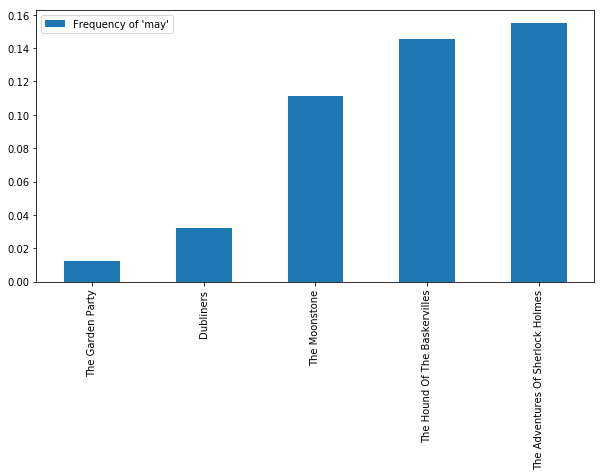

In [107]:
frequencies.plot(kind="bar")

### Conclusion 1:
According to the plot of the result above, the frequency of 'may' in _The Moonstone_ and _Sherlock Holmes_ is much higher than that in _Dubliners_ and _The Garden Party_, which is about 10 times of other types of stories. _The Moonstone_ and _Sherlock Holmes_ both belong to detective genre while _Dubliners_ and _The Garden Party_ are not. According to the frequency of 'may', I can draw the conclusion that the uncertainty of detective novels or story collections is much higher than that of other genres, which conforms to the hypothesis we made before. 

## A Comparative Stylometry of _The Moonstone_, _Sherlock Holmes_ and Other Genres of Literature

Uncertainty is one of the features of a text. And the technique of 'TfidfVectorize' can capture a large number of features of a text, not necessarily including uncertainty, to compare the stylometry of texts.

The function of the codes below is to measure how similar _The Moonstone_, by Wilkie Collins, and _The Hound of the Baskervilles_, one of the most famous novellas of _Sherlock Holmes_ corpus, and _The Adventures of Sherlock Holmes_, a story collection, and _Dubliners_ and _The Garden Party_, which are as references.

### Hypothesis 2：
_The Hound of the Baskervilles_ and _The Adventures of Sherlock Holmes_ should be the most similar because they both belong to the same corpus. And _The Moonstone_ should be more similar to _Sherlock Holmes_ than the other two novels because _The Moonstone_ and _Sherlock Holmes_ are both detective novels.

In [108]:
tfidf = TfidfVectorizer(use_idf=False, max_features=500)

I put labels on all the points I am going to create in the plot.

In [109]:
CorpusLabel = ['The Garden Party', 'Dubliners', 'The Moonstone', 'The Hound of the Baskervilles', 'The Adventures of Sherlock Holmes']

In [110]:
allTf = tfidf.fit_transform(Corpus).todense()

In [111]:
allTf.shape

(5, 500)

Now reduce the number of dimensions in that matrix from 500 to 2, so that we can plot it easier and see the relationships easier: 

In [112]:
pca = PCA(2)

In [113]:
allTf

matrix([[ 0.00179581,  0.        ,  0.01755906, ...,  0.0091786 ,
          0.01935487,  0.00239442],
        [ 0.00091842,  0.        ,  0.0197461 , ...,  0.01699083,
          0.0078066 ,  0.00168378],
        [ 0.00156746,  0.00820305,  0.01818257, ...,  0.00663559,
          0.03699212,  0.00376191],
        [ 0.00495292,  0.        ,  0.01926136, ...,  0.00385227,
          0.03283604,  0.00366883],
        [ 0.00329194,  0.        ,  0.01784021, ...,  0.00860153,
          0.04205193,  0.00446005]])

In [114]:
pcaOut = pca.fit_transform(allTf)

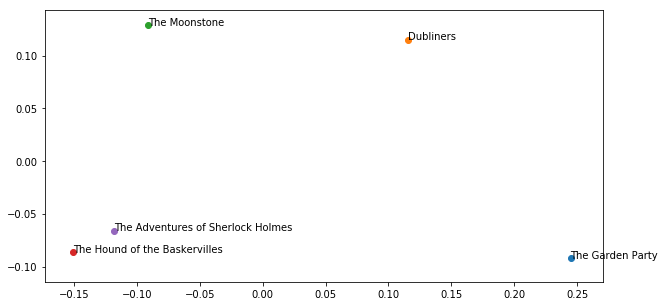

In [115]:
xs, ys = pcaOut[:,0], pcaOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(CorpusLabel[i], (xs[i], ys[i]))

### Conclusion 2:
According to the plot above, the two books belonging to the corpus of _Sherlock Holmes_ are the most similar. As expected, _Sherlock Holmes_ is more similar to _The Moonstone_ than _Dubliners_ and _The Garden Party_, which are as references. The result conforms to the hypothesis.

## William Wilkie Collins's influence on _Sherlock Holmes_

_The Moonstone_ is known as the first detective novel. Sergeant Cuff, who appears in _The Moonstone_, is known as one of the best detectives in Britain and so is Sherlock Homles created by Conan Doyle.
The two detectives, Cuff and Holmes, have similarities and differences. They both have some special hobbies. Cuff likes roses and Holmes uses drugs. Cuff is a great detective with great patience and resistance rather than superhuman gifts, while Sherlock Holmes reveals his knowledge of the criminal underworld of London, portraited as a genius.

### Hypothesis 3: 
The probability is high that Arthur Conan Doyle was influenced by Wilkie Collins and borrowed some traits from the detectives Collins made in his books.

Since the data and plot showed above proves their works are more similar compared to other books, I will print out the context of some motifs to validate the hypothesis.

In [116]:
moonstoneTokens = word_tokenize(moonstone)
moonstoneText = Text(moonstoneTokens)

Wilkie Collins is an addict of opium because of it is a euphoria though it was viewed as a symbol of corruption and licentiousness in the UK at that time. So I display the context of 'opium' in his book using the technique of concordance, _The Moonstone_. 

In [117]:
moonstoneText.concordance('opium', width=115)

Displaying 25 of 45 matches:
 time . Sometimes they said he was given up to smoking opium and collecting old books ; sometimes he was reported t
uable papers he possessed was by accepting a matter of opium as a matter of fact , my father was quite willing to t
rs from my sentence of death . But even the virtues of opium have their limit . The progress of the disease has gra
of the disease has gradually forced me from the use of opium to the abuse of it . I am feeling the penalty at last 
 suppose . Have you ever been accustomed to the use of opium ? ” “ I never tasted it in my life. ” “ Were your nerv
 said , “ that you have never–to your knowledge–tasted opium in your life. ” “ To my knowledge , ” I repeated . “ Y
 Let us go on . You are not aware of ever having taken opium . At this time , last year , you were suffering from n
 took the Diamond , in a state of trance , produced by opium . Secondly , that the opium was given to you by Mr. Ca
te of trance , produced by opium . Secondly

From the context of 'opium', it is learned that Colonel used opium, so did Frankin Blake. And the effect of opium is harmful, some of them resulting in adverse consequences.

Sergeant Cuff seems to like roses. Let's see the context that surrounds 'roses'.

In [118]:
moonstoneText.concordance('roses', width=115)

Displaying 22 of 22 matches:
 these . Grass , Mr. Gardener–grass walks between your roses ; gravel ’ s too hard for them . That ’ s a sweet pret
o hard for them . That ’ s a sweet pretty bed of white roses and blush roses . They always mix well together , don 
. That ’ s a sweet pretty bed of white roses and blush roses . They always mix well together , don ’ t they ? Here 
 out the thief who stole it ! “ You seem to be fond of roses , Sergeant ? ” I remarked . “ I haven ’ t much time to
fondness to bestow , most times , Mr. Betteredge , the roses get it . I began my life among them in my father ’ s n
ire from catching thieves , and try my hand at growing roses . There will be grass walks , Mr. Gardener , between m
aracter . It reminded him , you see , of his favourite roses , and , as HE whistled it , it was the most melancholy
is weekly account . The Sergeant got on the subject of roses and the merits of grass walks and gravel walks immedia
them , head over ears in an argument on the

Seeing sentences or phrases like “You seem to be fond of roses, Sergeant ?”, "the subject of his favourite roses", we can conclude it is true that Cuff loves roses.

Let's see the context of 'opium' in _Sherlock Holmes_ and see what Sherlock Holmes loves.

In [119]:
ScarletTokenText = Text(word_tokenize(Scarlet))
AdvtuHolmesTokenText = Text(word_tokenize(AdvtuHolmes))

In [120]:
AdvtuHolmesTokenText.concordance('opium', width=300)

Displaying 11 of 11 matches:
 TWISTED LIP Isa Whitney , brother of the late Elias Whitney , D.D. , Principal of the Theological College of St. George 's , was much addicted to opium . The habit grew upon him , as I understand , from some foolish freak when he was at college ; for having read De Quincey 's description of his dr
could bring him back to her ? It seems that it was . She had the surest information that of late he had , when the fit was on him , made use of an opium den in the farthest east of the City . Hitherto his orgies had always been confined to one day , and he had come back , twitching and shattered , 
and by the light of a flickering oil-lamp above the door I found the latch and made my way into a long , low room , thick and heavy with the brown opium smoke , and terraced with wooden berths , like the forecastle of an emigrant ship . Through the gloom one could dimly catch a glimpse of bodies ly
 . They could only have come from the old man at my side , and yet he s

It is interesting that the phrase, "opium den", appears frequently. As far as I know, it appears in _The Man with the Twisted Lip_ collected in _The Adventures of Sherlock Holmes_. Although whether Conan Doyle himself took up the "pipe" has remained undisclosed, he must have visited the opium den.

In [121]:
AdvtuHolmesTokenText.concordance('cocaine', width=300)

Displaying 3 of 3 matches:
 with his whole Bohemian soul , remained in our lodgings in Baker Street , buried among his old books , and alternating from week to week between cocaine and ambition , the drowsiness of the drug , and the fierce energy of his own keen nature . He was still , as ever , deeply attracted by the study
tric , anatomy unsystematic , sensational literature and crime records unique , violin-player , boxer , swordsman , lawyer , and self-poisoner by cocaine and tobacco . Those , I think , were the main points of my analysis . '' Holmes grinned at the last item . `` Well , '' he said , `` I say now , 
himself out and burst into a hearty fit of laughter . `` I suppose , Watson , '' said he , `` that you imagine that I have added opium-smoking to cocaine injections , and all the other little weaknesses on which you have favoured me with your medical views . '' `` I was certainly surprised to find 


In [122]:
ScarletTokenText.concordance('violin', width=300)

Displaying 5 of 5 matches:
 Do you include violin-playing in your category of rows ? '' he asked , anxiously . `` It depends on the player , '' I answered . `` A well-played violin is a treat for the gods -- a badly-played one -- -- '' '' Oh , that 's all right , '' he cried , with a merry laugh . `` I think we may consider t
nsystematic . 9 . Sensational Literature. -- Immense . He appears to know every detail of every horror perpetrated in the century . 10 . Plays the violin well . 11 . Is an expert singlestick player , boxer , and swordsman . 12 . Has a good practical knowledge of British law . When I had got so far i
ch needs them all , '' I said to myself , `` I may as well give up the attempt at once . '' I see that I have alluded above to his powers upon the violin . These were very remarkable , but as eccentric as all his other accomplishments . That he could play pieces , and difficult pieces , I knew well 
 his advice . When I returned with the pistol the table had been clear

From the context above, it is certain that Sherlock Holmes loves playing the violin a lot and sometimes he injects cocaine and smokes tobacco.

### Conclusion 3:
All these pieces of evidence increase the belief that there are some influences on Arthur Conan Doyle from Wilkie Collins.

##  Sentiment Analysis of Women Characters 
Sentiment analysis bases on TextBlob library for processing textual data.

During the era of Victoria, women did not have the right to vote, sue, or own property. At the same time, the number of women participated in the paid workforce increased. In the last years of the Victorian era, feminist ideas spread among the educated middle classes and discriminatory laws were repealed. It is interesting to compare the sentiment of texts containing female to those without in detective novels written in that time.

### Hypothesis 4：
Female characters may be portrayed weaker than the male in detective novels during the period of Victoria. 

In [123]:
moonstoneSents = sent_tokenize(moonstone)
clackSents = sent_tokenize(clack)
AdvtuHolmesSents = sent_tokenize(AdvtuHolmes)
dublinersSents = sent_tokenize(dubliners)
HoundSents = sent_tokenize(Hound)

This is a program to pick up sentences containing female ('she', 'her', 'hers', 'woman', 'women') from the whole text.

In [124]:
Women = []
noWomen = []
for sent in moonstoneSents: 
    if ' she ' in sent or ' her ' in sent or ' hers ' in sent or ' woman ' in sent or ' women ' in sent: 
        Women.append(sent)
    else: 
        noWomen.append(sent)

In [125]:
Women0 = []
for sent in clackSents: 
    if ' she ' in sent or ' her ' in sent or ' hers ' in sent or ' woman ' in sent or ' women ' in sent: 
        Women0.append(sent)

In [126]:
clackWomen = ' '.join(Women0)

In [127]:
MoonstoneWomen = ' '.join(Women)
MoonstoneNoWomen = ' '.join(noWomen)

In [128]:
Women1 = []
noWomen1 = []
for sent in AdvtuHolmesSents: 
    if ' she ' in sent or ' her ' in sent or ' hers ' in sent or ' woman ' in sent or ' women ' in sent:
        Women1.append(sent)
    else: 
        noWomen1.append(sent)

In [129]:
AdvtuHolmesWomen = ' '.join(Women1)
AdvtuHolmesNoWomen = ' '.join(noWomen1)

In [130]:
Women2 = []
noWomen2 = []
for sent in dublinersSents: 
    if ' she ' in sent or ' her ' in sent or ' hers ' in sent or ' woman ' in sent or ' women ' in sent:
        Women2.append(sent)
    else: 
        noWomen2.append(sent)

In [131]:
dublinersWomen = ' '.join(Women2)
dublinersNoWomen = ' '.join(noWomen2)

The polarity score is a float within the range [-1.0, 1.0], from negative to positive.
Let's test it by three interesting sentences first!

In [132]:
testimonial0 = TextBlob("My final project is extremely awesome that everyone loves it.")
testimonial0.sentiment

Sentiment(polarity=0.5, subjectivity=1.0)

In [133]:
testimonial1 = TextBlob("Mike Wallace is here!")
testimonial1.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [134]:
testimonial2 = TextBlob("I love California so much expecially cold Berkeley, but I have to leave tomorrow morning.")
testimonial2.sentiment

Sentiment(polarity=0.033333333333333326, subjectivity=0.6)

TextBlob cannot be always correct, for instance, it does not know Mike Wallace, but we can use it if the length of the text is big enough. 

In [135]:
SeveralTexts = [clackWomen, MoonstoneWomen, MoonstoneNoWomen, AdvtuHolmesWomen, AdvtuHolmesNoWomen, dublinersWomen, dublinersNoWomen]

In [136]:
SeveralBlobs = [TextBlob(text).sentiment
            for text in SeveralTexts]

In [137]:
SeveralSentiments = [item.polarity
                 for item in SeveralBlobs]

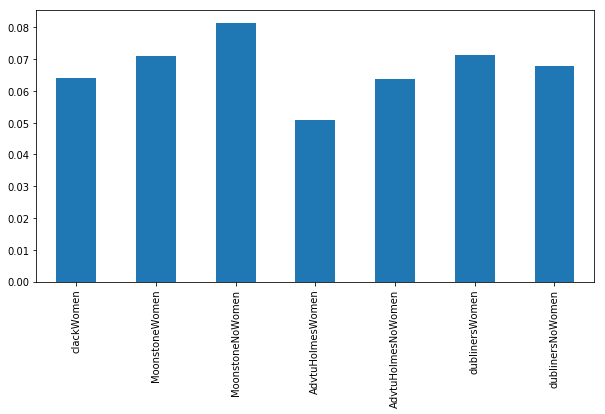

In [138]:
pd.Series(SeveralSentiments, index=["clackWomen", "MoonstoneWomen", "MoonstoneNoWomen", "AdvtuHolmesWomen", "AdvtuHolmesNoWomen", "dublinersWomen", "dublinersNoWomen"]).plot(kind='bar')

### Conclusion 4:
In _The Moonstone_, When Cuff was investigating the case, it is more often that Cuff talked to Betteredge, the house-steward rather than Mrs.Verinder. Mrs. Ablewhite, Rachel's aunt, was so upset that Rachel went back on the engagement. Rosanna Spearman, the poor servant, committed suicide silently. All these pieces of evidence implicate female status was lower than male in that era.

In _Sherlock Holmes_, there are several female characters in different stories. Sherlock Holmes seems to have little interest in women in most times though he deals with women with gentleness and courtesy. There is one exception, Irene Adler, a character in _A Scandal in Bohemia_, collected in _The Adventures of Sherlock Holmes_ because she is the only woman who beat Sherlock in the battle of wits.

It is known that there were both resistance and obedience of women during the Victorian era. Irene Adler in _Adventure of Sherlock Holmes_ could be an example that the social position of the female has been increasing.

From the plot above, in _The Moonstone_, sentences containing women ("she", "her", "hers", "woman", "women") are less positive than those without, and that of the part of Miss Clack's narrative is even more negative compared with the whole text.
The same thing happens in _The Adventures of Sherlock Holmes_. This might be another influence on Conan Doyle by Wilkie Collins. The result of _Dubliners_ is the opposite. Although the relative difference of the height of bars is not so big, it still shows that female characters are portrayed weaker in these two detective novels more and less.

## Epilogue
The method and the focus diversifies when a text is analyzed by human and computer. The result of the analysis cannot be always the same. However, it becomes more and more important to combine brain and computer when reading works of literature for synergy effect. 

In my project, hypotheses are based on reading by the human. Since computers are better to deal with long texts in a much shorter time, I calculated the frequency of 'may', plotted a comparative stylometry, displayed the context of some certain words and analyzed the sentiment using TextBlob, a library for processing textual data, by computer. With the help of computational literary analysis, people can develop a more profound understanding of literary works.

## Work Cited

### Wordcount Function

Please replace `Yourname-Final.ipynb` with the filename of this notebook. For instance, if my name is Jonathan, and I've renamed this notebook to `Jonathan-Final.ipynb`, I'd change `filename = 'Yourname-Final.ipynb'` below to `filename = 'Jonathan-Final.ipynb`. 

In [142]:
filename = 'Bo Zhao-Final.ipynb'

if filename == 'Yourname-Final.ipynb': 
    raise ValueError("You forgot to change the filename above!")

with open('Bo Zhao-Final.ipynb', encoding='utf-8') as f:
    nb = current.read(f, 'json')

wordCount = 0

for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        wordCount += len(cell['source'].replace('#', '').lstrip().split(' '))

# This is the word count of my instructions. 
# My instructions obviously don't count toward the final word count, 
tare = 533

wordCount = wordCount - tare

print("Total words: {}".format(wordCount))

if wordCount < 1000: 
    raise Warning('Your paper has not yet met the minimum required length.')
if wordCount > 2000: 
    raise Warning('Your paper has exceeded the maximum allowed length. Please edit for concision.')

Total words: 1508
